In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

---
# Inicio
## Cargamos el dataset

In [2]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

ptype     price  surface_total_in_m2  surface_covered_in_m2  \
2944  apartment   79000.0                 33.0                   31.0   
4370  apartment  165700.0                 61.0                   57.0   
5113  apartment  144000.0                 58.0                   38.0   

      price_usd_per_m2  floor  rooms             place   disposicion  \
2944       2393.939394    0.0    1.0     San Cristóbal  contrafrente   
4370       2716.393443    5.0    3.0  Parque Chacabuco        frente   
5113       2482.758621    5.0    3.0             Nuñez        frente   

      aEstrenar  garage  balcon  piscina  sum  patio  lavadero  amenities  \
2944          0       0       1        0    1      0         1          1   
4370          0       0       1        0    1      1         0          1   
5113          0       0       1        0    0      1         0          1   

      parrilla  
2944         1  
4370         1  
5113         0

---
# Modelo
Este modelo solo utiliza las columnas básicas del dataset: ptype, place, floor y rooms

In [3]:
y_columnas = ['price_usd_per_m2']
x_columnas = ['ptype','floor','rooms','place']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)
data_modelo

price_usd_per_m2      ptype  floor  rooms                place
0          1309.090909  apartment    3.0    2.0              Liniers
1          1812.500000  apartment    2.0    4.0                Boedo
2          1702.127660  apartment    1.0    5.0            Balvanera
3          2200.000000  apartment    1.0    3.0            Caballito
4          3236.363636  apartment   12.0    3.0             Belgrano
...                ...        ...    ...    ...                  ...
6397       1857.142857  apartment    2.0    2.0                 Boca
6398       3461.538462  apartment    4.0    4.0            Caballito
6399       2650.000000  apartment    1.0    3.0              Palermo
6400       1826.923077  apartment    1.0    0.0  Villa General Mitre
6401       2611.464968  apartment    1.0    0.0              Palermo

[6402 rows x 5 columns]

### Análisis correlación

In [4]:
#Análisis de correlación entre variables
data_modelo.corr()

price_usd_per_m2     floor     rooms
price_usd_per_m2          1.000000  0.058369 -0.144575
floor                     0.058369  1.000000  0.033199
rooms                    -0.144575  0.033199  1.000000

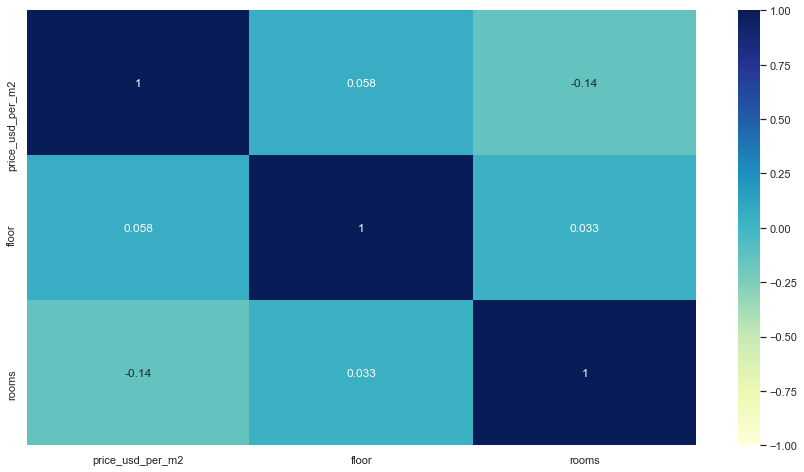

In [5]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_modelo.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

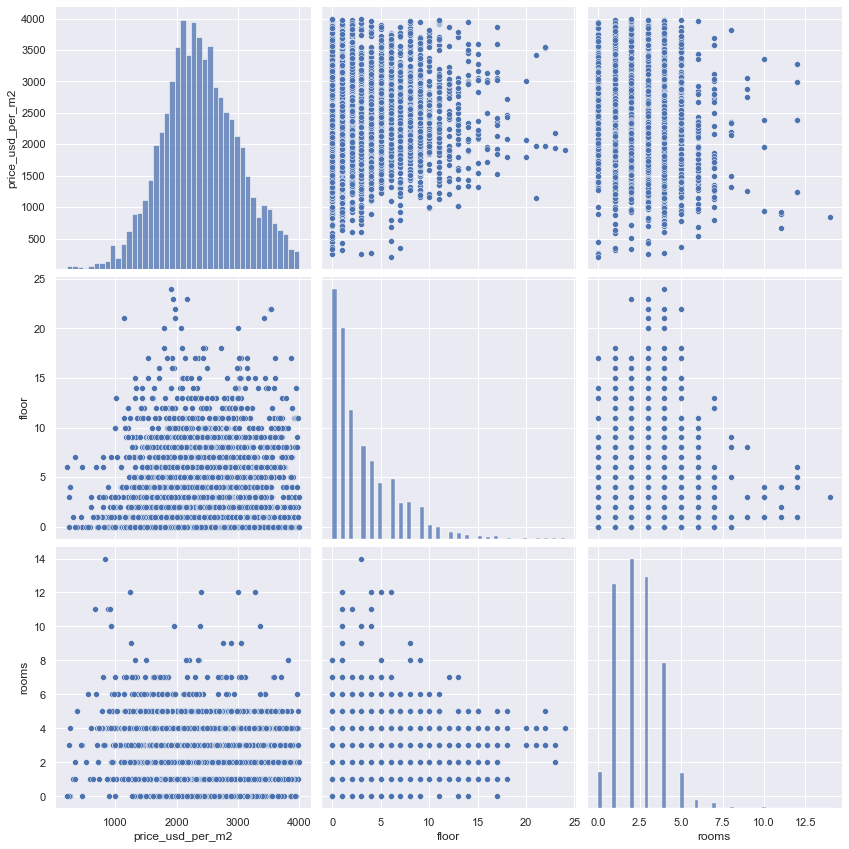

In [6]:
sns.pairplot(data=data_modelo, height=4)

In [7]:
name_model="Modelo 1" #Cambiar este nombre para cambiar los resultados de los estadísticos de cada algoritmo

## Pre-Training
### Manejo variables categóricas
Modificar las variables que deban ser dumificadas

In [8]:
#Creo dummies
#Convierto floor a object
data_modelo['floor'] = data_modelo['floor'].astype(np.object)
data_dummies=pd.get_dummies(data_modelo[['ptype','floor','place']], drop_first = True)
data_dummies

ptype_apartment  ptype_house  floor_1.0  floor_2.0  floor_3.0  \
0                   1            0          0          0          1   
1                   1            0          0          1          0   
2                   1            0          1          0          0   
3                   1            0          1          0          0   
4                   1            0          0          0          0   
...               ...          ...        ...        ...        ...   
6397                1            0          0          1          0   
6398                1            0          0          0          0   
6399                1            0          1          0          0   
6400                1            0          1          0          0   
6401                1            0          1          0          0   

      floor_4.0  floor_5.0  floor_6.0  floor_7.0  floor_8.0  ...  \
0             0          0          0          0          0  ...   
1             0          0          0          0          0  ...   
2             0          0          0          0          0  ...   
3             0          0          0          0          0  ...   
4             0          0          0          0          0  ...   
...         ...        ...        ...        ...        ...  ...   
6397          0          0          0          0          0  ...   
6398          1          0          0          0          0  ...   
6399          0          0          0          0          0  ...   
6400          0          0          0          0          0  ...   
6401          0          0          0          0          0  ...   

      place_Villa Lugano  place_Villa Luro  place_Villa Ortuzar  \
0                      0                 0                    0   
1                      0                 0                    0   
2                      0                 0                    0   
3                      0                 0                    0   
4                      0                 0                    0   
...                  ...               ...                  ...   
6397                   0                 0                    0   
6398                   0                 0                    0   
6399                   0                 0                    0   
6400                   0                 0                    0   
6401                   0                 0                    0   

      place_Villa Pueyrredón  place_Villa Real  place_Villa Riachuelo  \
0                          0                 0                      0   
1                          0                 0                      0   
2                          0                 0                      0   
3                          0                 0                      0   
4                          0                 0                      0   
...                      ...               ...                    ...   
6397                       0                 0                      0   
6398                       0                 0                      0   
6399                       0                 0                      0   
6400                       0                 0                      0   
6401                       0                 0                      0   

      place_Villa Santa Rita  place_Villa Soldati  place_Villa Urquiza  \
0                          0                    0                    0   
1                          0                    0                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                          0                    0                    0   
...                      ...                  ...                  ...   
6397                       0                    0                    0   
6398                       0                    0             

In [9]:
#Concateno las columnas que están por fuera del dummie
columnas=['price_usd_per_m2','rooms']
data_modelo = pd.concat([data[columnas],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)

price_usd_per_m2  rooms  ptype_apartment  ptype_house  floor_1.0  \
0       1309.090909    2.0                1            0          0   
1       1812.500000    4.0                1            0          0   
2       1702.127660    5.0                1            0          1   

   floor_2.0  floor_3.0  floor_4.0  floor_5.0  floor_6.0  ...  \
0          0          1          0          0          0  ...   
1          1          0          0          0          0  ...   
2          0          0          0          0          0  ...   

   place_Villa Lugano  place_Villa Luro  place_Villa Ortuzar  \
0                   0                 0                    0   
1                   0                 0                    0   
2                   0                 0                    0   

   place_Villa Pueyrredón  place_Villa Real  place_Villa Riachuelo  \
0                       0                 0                      0   
1                       0                 0                      0   
2                       0                 0                      0   

   place_Villa Santa Rita  place_Villa Soldati  place_Villa Urquiza  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   

   place_Villa del Parque  
0                       0  
1                       0  
2                       0  

[3 rows x 74 columns]

## Algoritmos

In [10]:
#Genero mi variable X
X=data_modelo.drop(['price_usd_per_m2'],axis=1)

#Genero la variable y
y = data_modelo[y_columnas].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [11]:
#Entrenamos modelo LR
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)
#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({name_model+' LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lr

Modelo 1 LR
MSE Test      246105.843601
MSE Train     242343.264632
MAE Test         380.854556
MAE Train        379.217066
RMSE Test        496.090560
RMSE Train       492.283724
R2 Test            0.330598
R2 Train           0.385978
R2 Adj Test        0.304141
R2 Adj Train       0.375807

In [12]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

Intercept: 1992.724208860113
Coeficientes:
rooms                     -68.359053
ptype_apartment           130.640445
ptype_house                16.110739
floor_1.0                 -36.297963
floor_2.0                  17.318741
                             ...    
place_Villa Riachuelo    -358.158583
place_Villa Santa Rita     39.757007
place_Villa Soldati      -895.961818
place_Villa Urquiza       591.490925
place_Villa del Parque     35.586640
Length: 73, dtype: float64
None


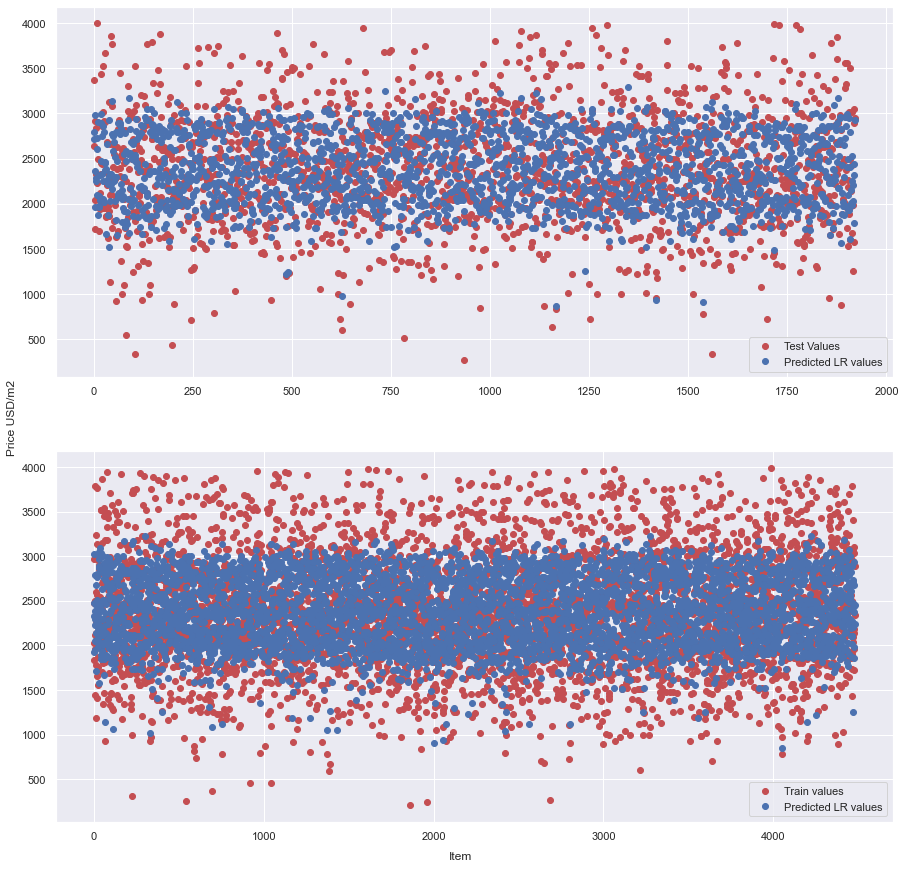

In [13]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

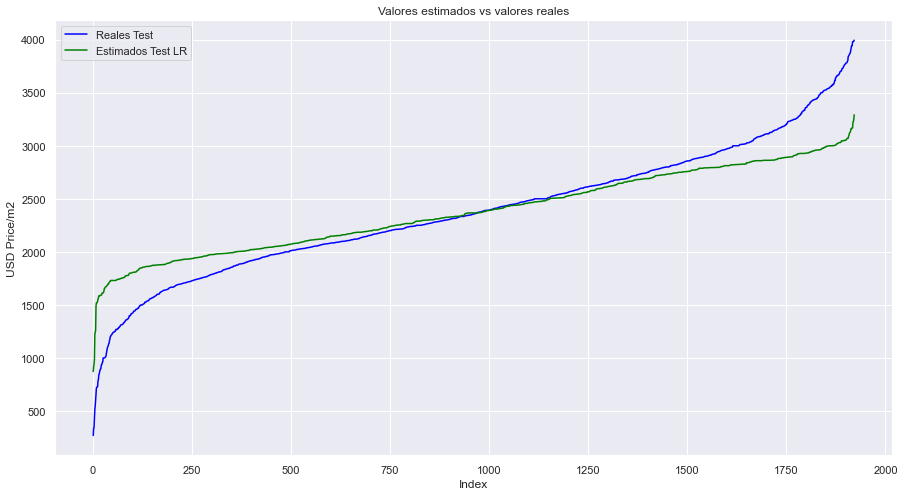

In [14]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

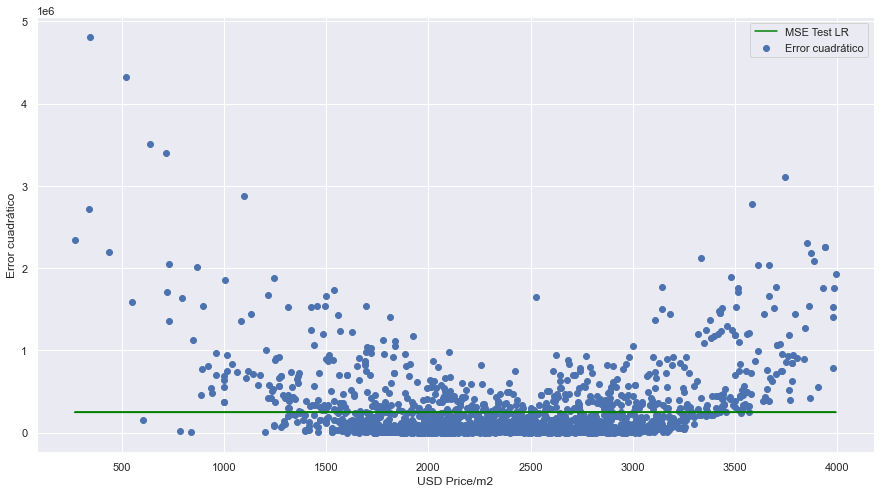

In [15]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lr=pow(y_test - lr_prediction,2)
plt.scatter(y_test,err_cuad_test_lr, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lr,len(err_cuad_test_lr)), label='MSE Test LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

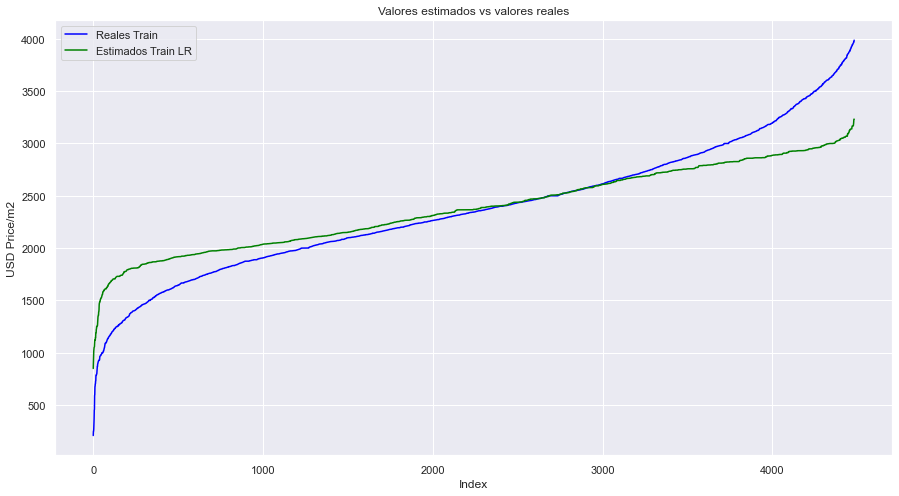

In [16]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

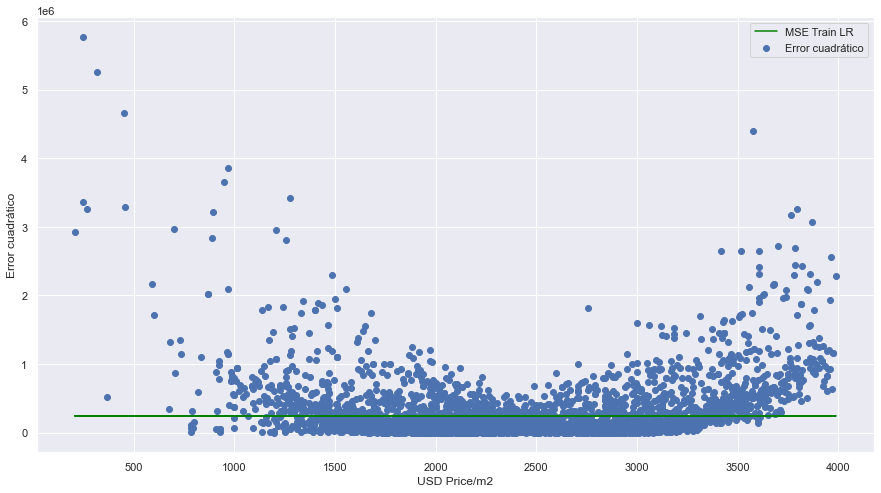

In [17]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lr=pow(y_train - lr_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lr, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lr,len(err_cuad_train_lr)), label='MSE Train LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

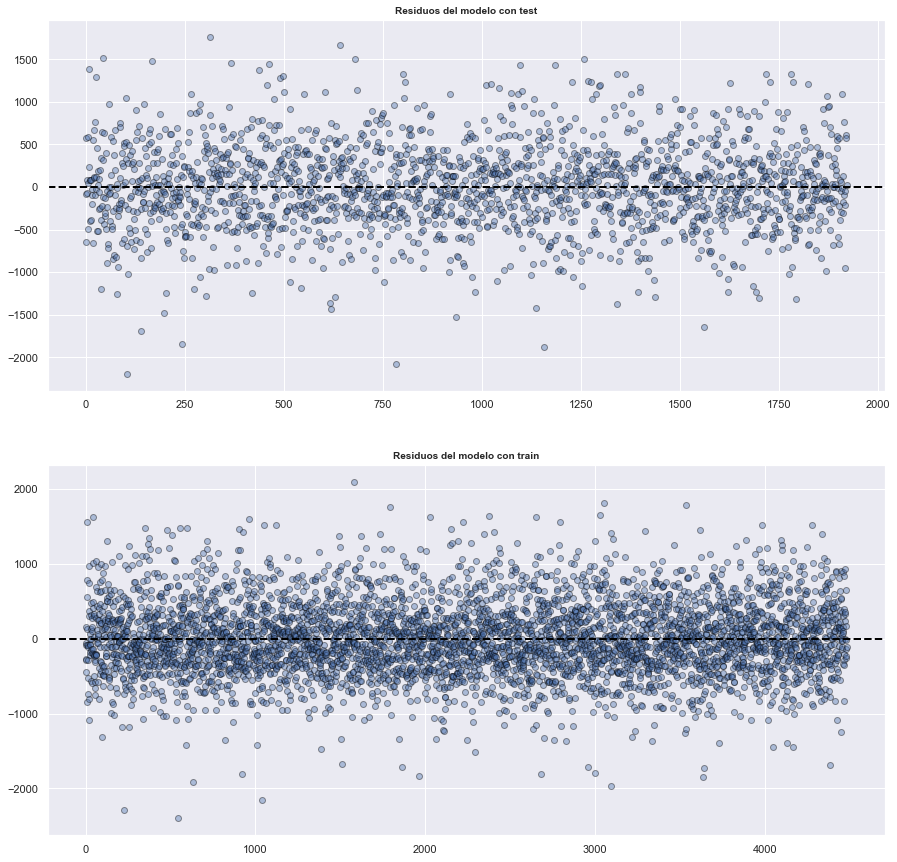

In [18]:
#Gráfico de los residuos/errores
model_residuals_test_lr = y_test - lr_prediction
model_residuals_train_lr = y_train-lr_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

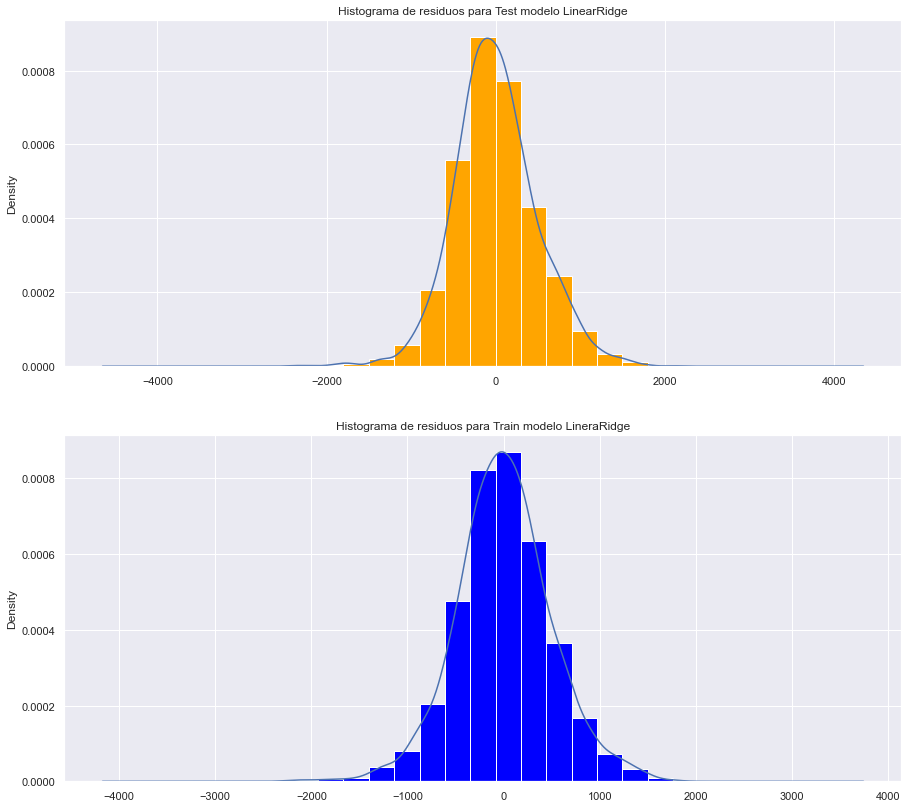

In [19]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lr.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lr.plot(kind = "kde",ax=ax2);
model_residuals_train_lr.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lr.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo LinearRidge");
ax2.set_title("Histograma de residuos para Train modelo LineraRidge");

### OLS

In [20]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()
#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)
X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({name_model+' OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])

#Summary
print(model_ols.summary())
print("")
print(stats_dataframe_ols)

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:41:25   Log-Likelihood:                -34136.
No. Observations:                4481   AIC:                         6.842e+04
Df Residuals:                    4407   BIC:                         6.889e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

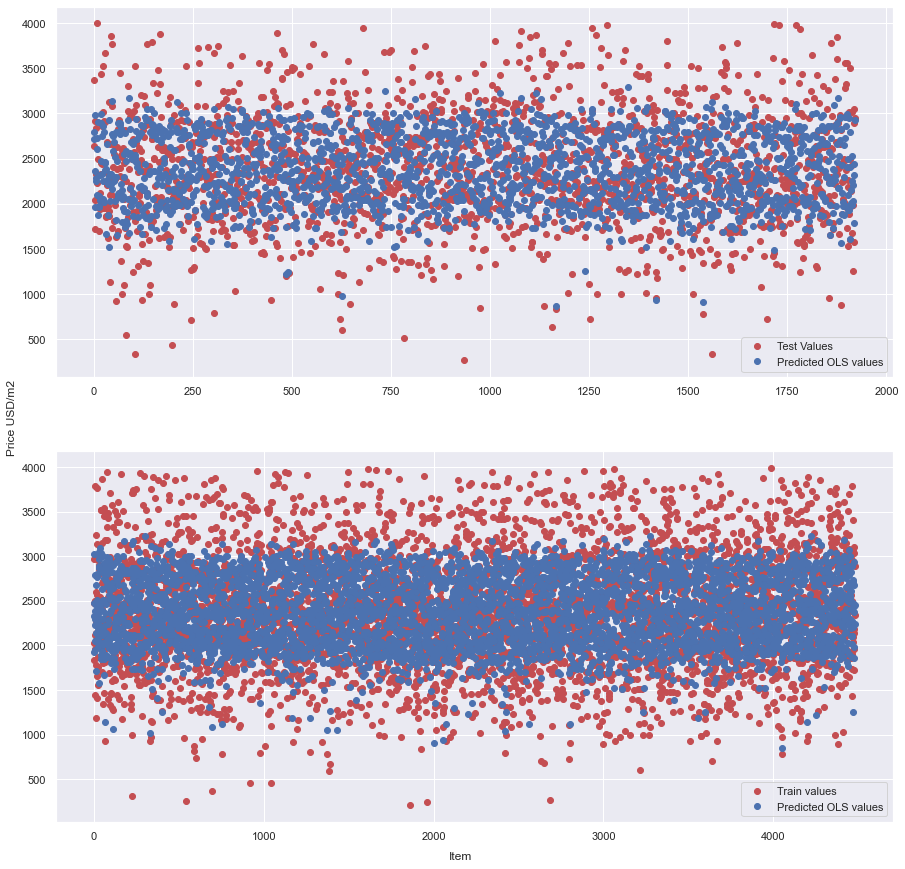

In [21]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

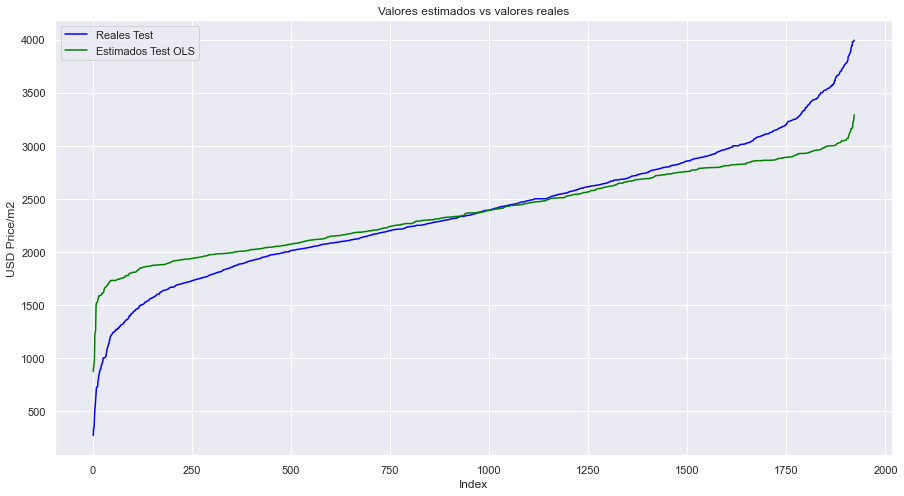

In [22]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

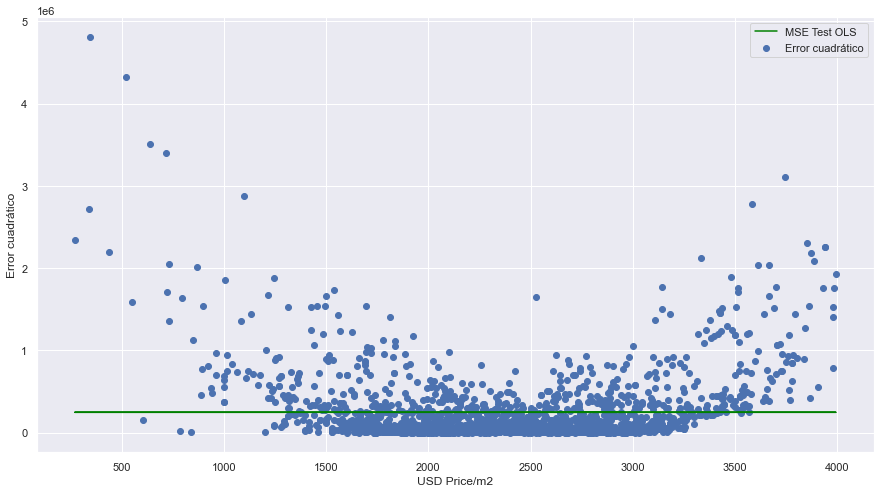

In [23]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

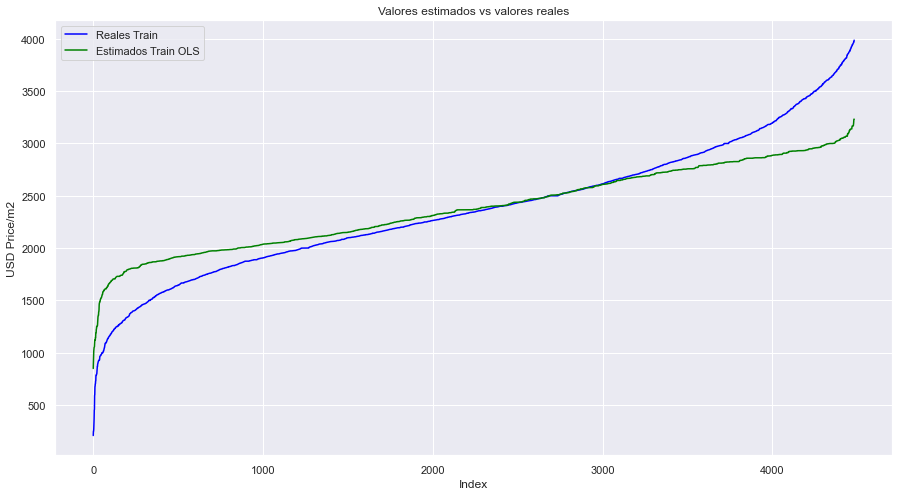

In [24]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

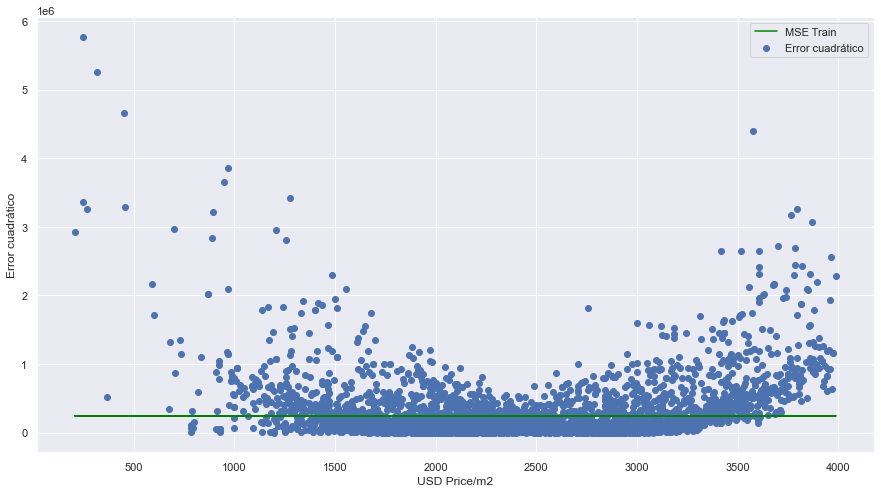

In [25]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

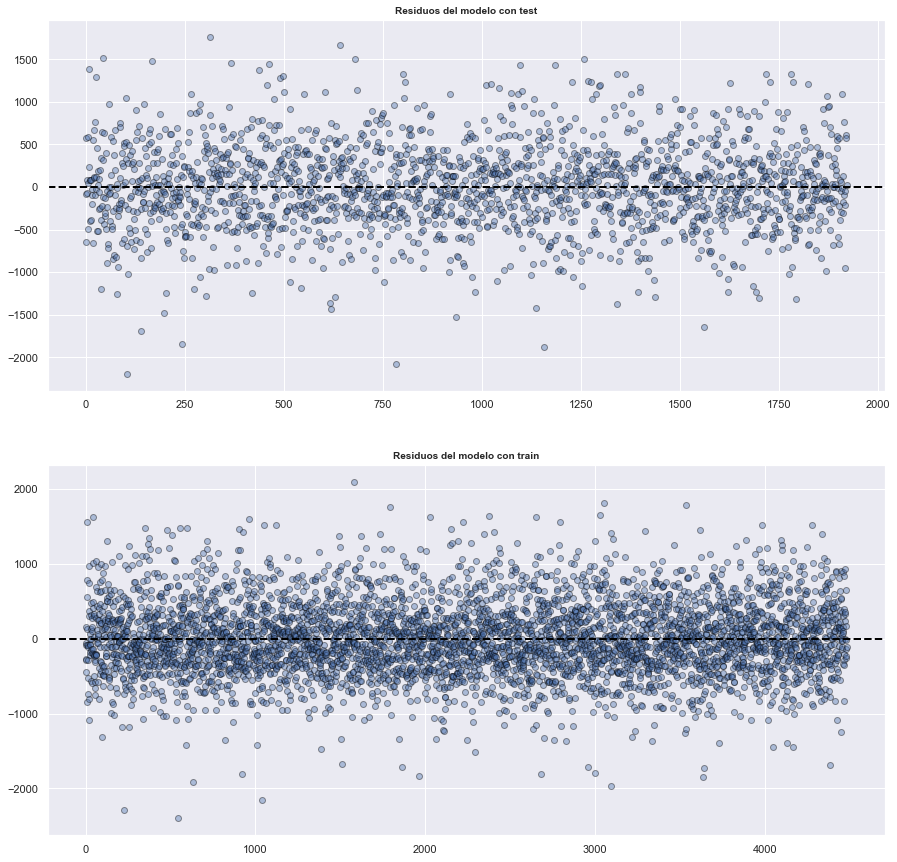

In [26]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

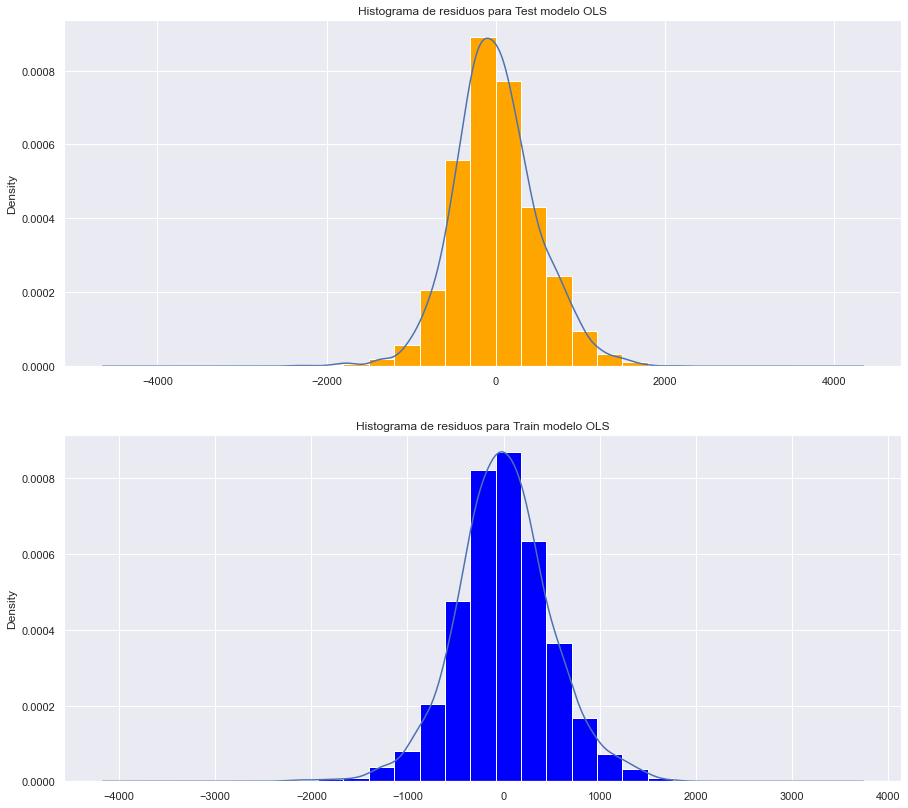

In [27]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");

### LASSO

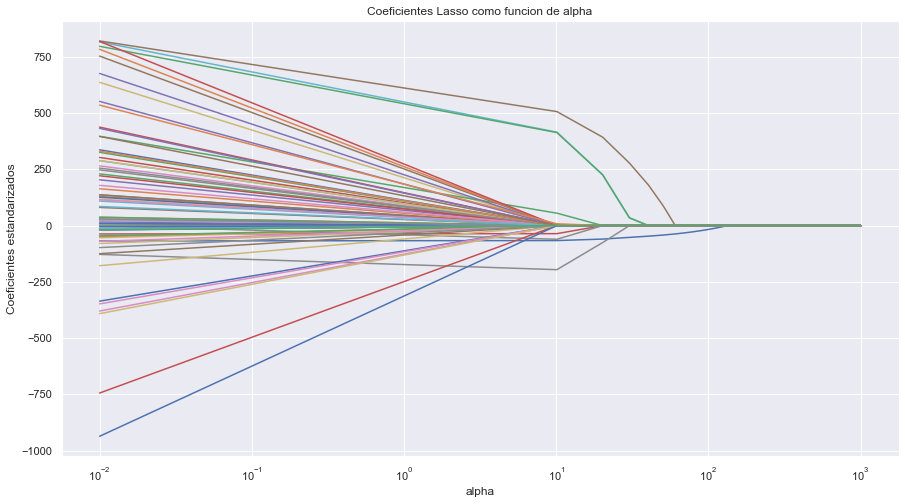

In [28]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,100)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [29]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)
#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({name_model+' Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

Modelo 1 Lasso
MSE Test       245457.276663
MSE Train      242865.321497
MAE Test          379.925456
MAE Train         380.036843
RMSE Test         495.436451
RMSE Train        492.813678
R2 Test             0.332362
R2 Train            0.384655
R2 Adj Test         0.310084
R2 Adj Train        0.376020

In [30]:
print("Alpha Lasso:",alpha_lasso)
print("Intercept Lasso:",intercept_lasso)
print("Coeficientes Ridge:")
print(pd.Series(coeff_lasso, index=X.columns))

Alpha Lasso: 0.15362708064812505
Intercept Lasso: 2089.522496065699
Coeficientes Ridge:
rooms                     -67.861449
ptype_apartment           125.671103
ptype_house                 0.000000
floor_1.0                 -47.257264
floor_2.0                   3.797982
                             ...    
place_Villa Riachuelo    -100.022440
place_Villa Santa Rita    -18.448014
place_Villa Soldati      -749.138520
place_Villa Urquiza       502.663455
place_Villa del Parque    -27.782978
Length: 73, dtype: float64


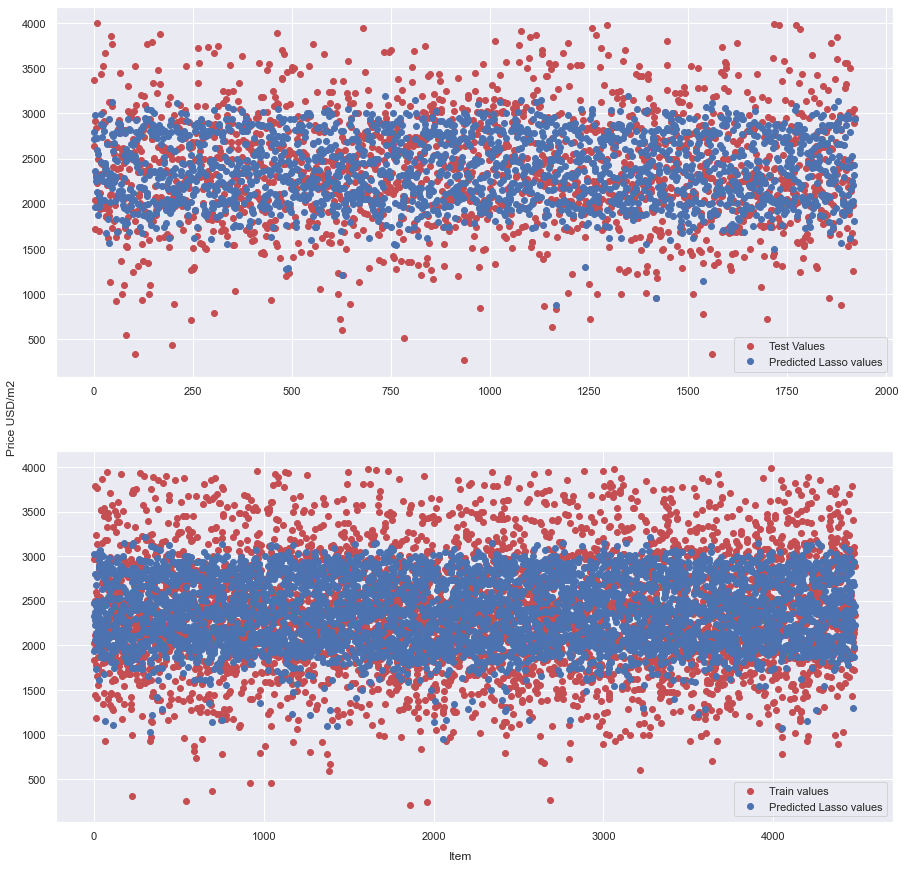

In [31]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lasso_prediction, 'bo', label="Predicted Lasso values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lasso_prediction_train, 'bo', label="Predicted Lasso values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

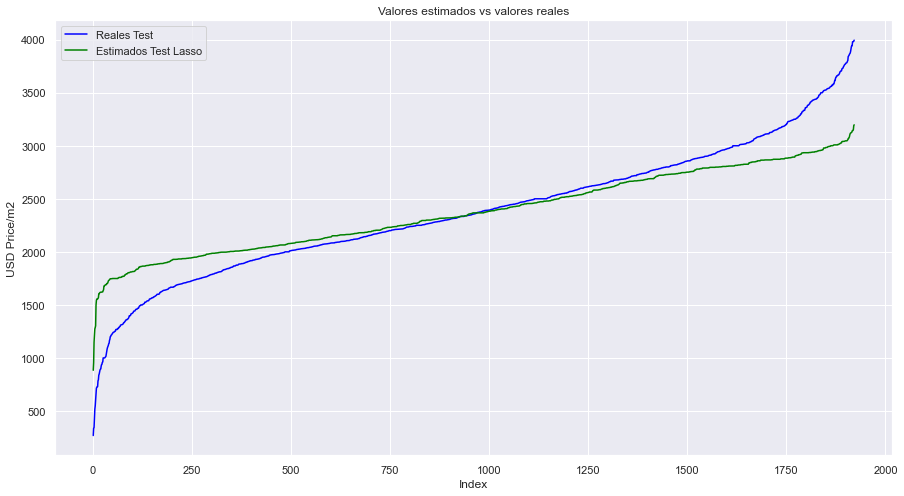

In [32]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lasso_prediction), color='green', label='Estimados Test Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

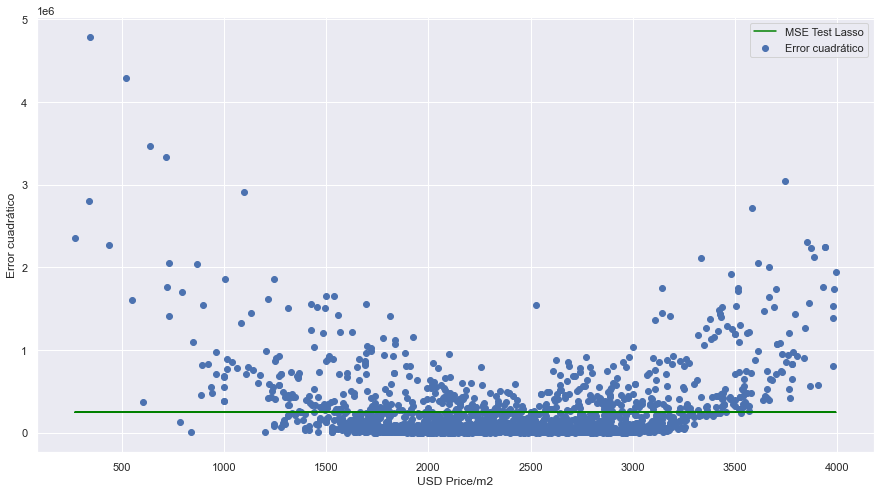

In [33]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lasso=pow(y_test - lasso_prediction,2)
plt.scatter(y_test,err_cuad_test_lasso, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lasso,len(err_cuad_test_lasso)), label='MSE Test Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

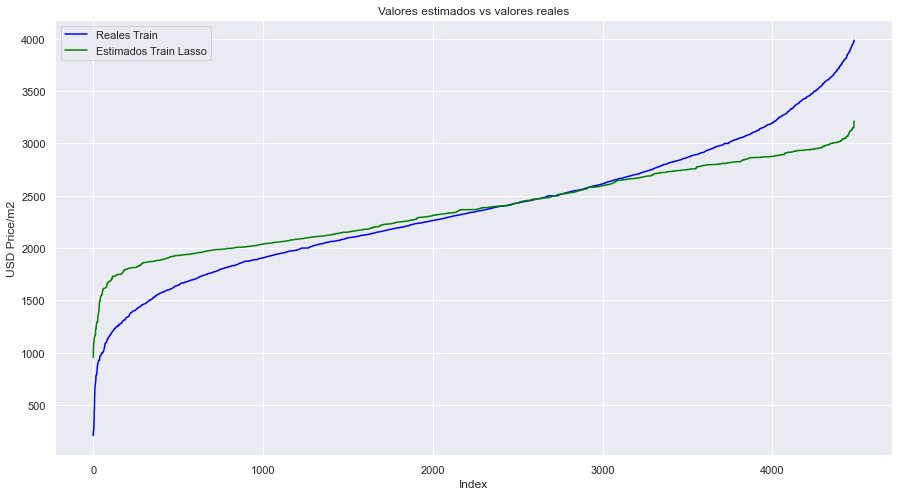

In [34]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lasso_prediction_train), color='green', label='Estimados Train Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

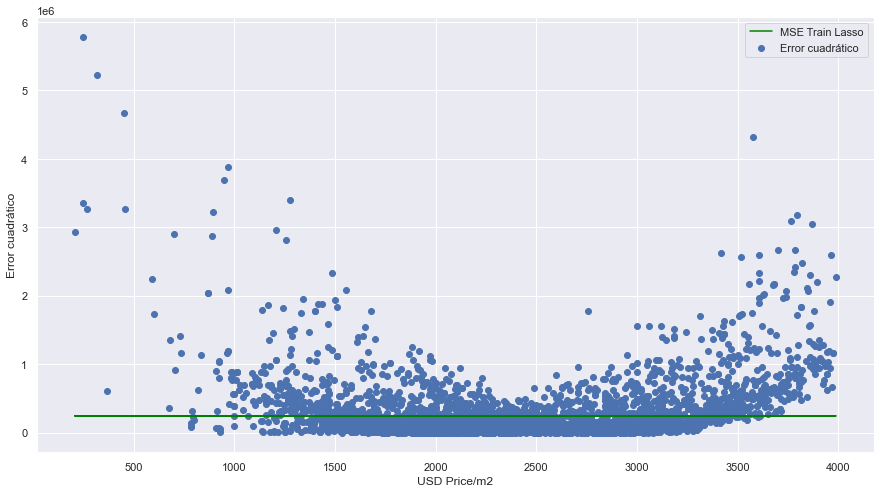

In [35]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lasso=pow(y_train - lasso_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lasso, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lasso,len(err_cuad_train_lasso)), label='MSE Train Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

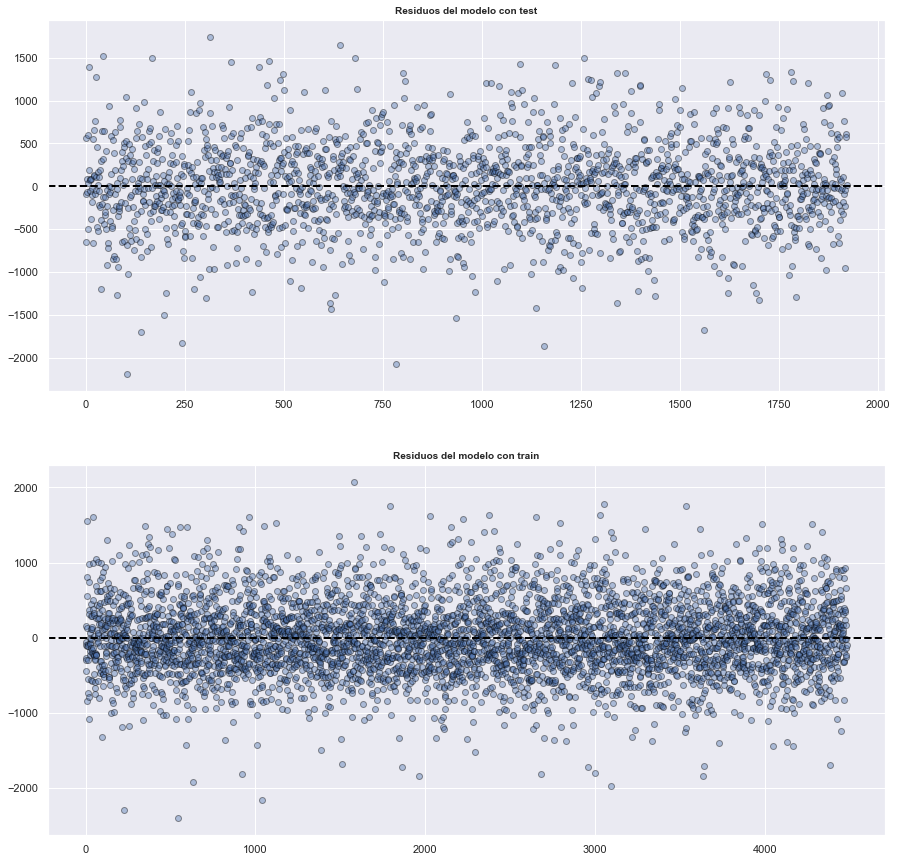

In [36]:
#Gráfico de los residuos/errores
model_residuals_test_lasso = y_test - lasso_prediction
model_residuals_train_lasso = y_train-lasso_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

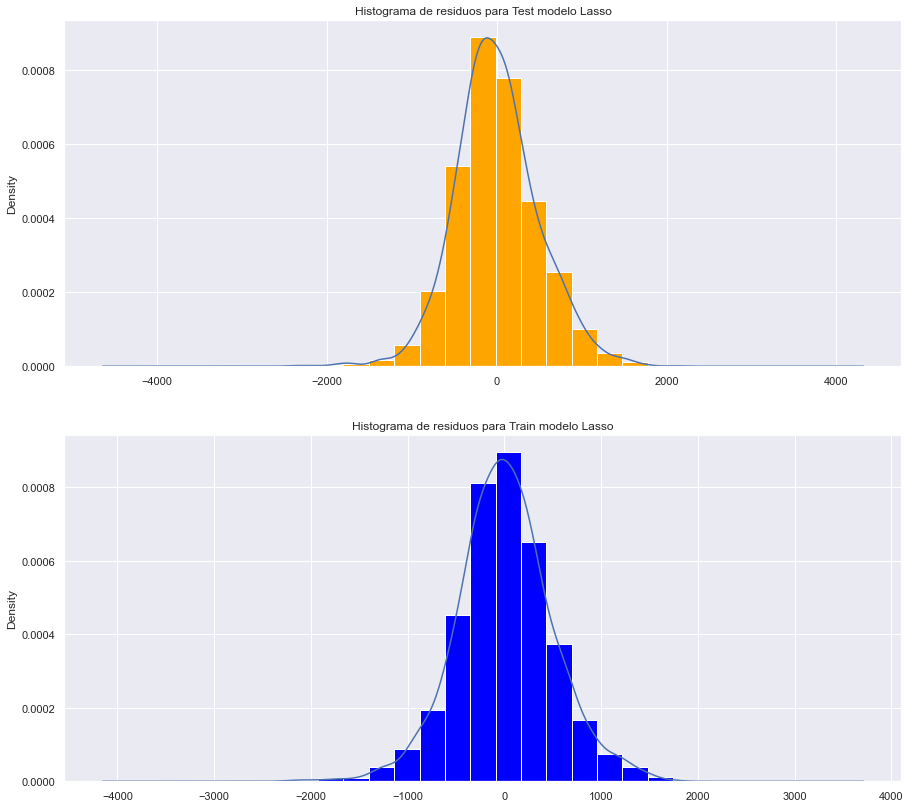

In [37]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lasso.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lasso.plot(kind = "kde",ax=ax2);
model_residuals_train_lasso.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lasso.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Lasso");
ax2.set_title("Histograma de residuos para Train modelo Lasso");

## Ridge

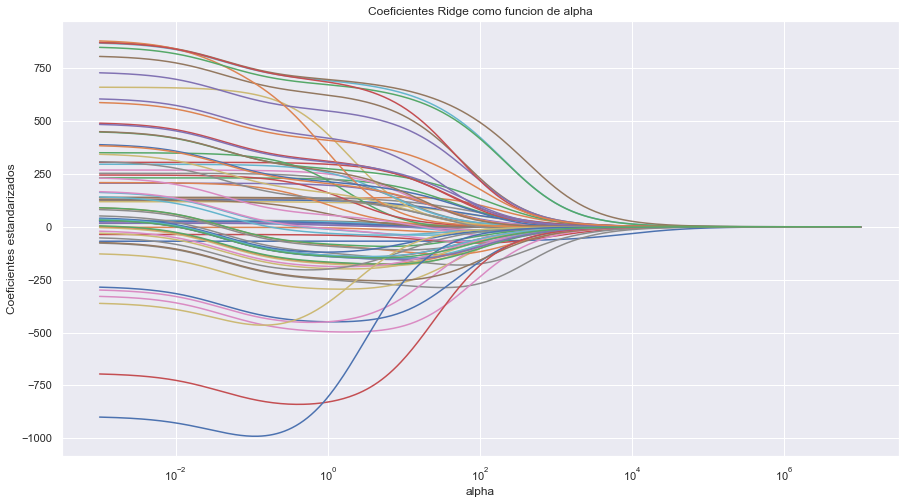

In [38]:
#Análisis previo de los alpha
#alphas_ridge = np.logspace(-10, 10, 400)
alphas_ridge = np.logspace(-3, 7,400)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [39]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)
#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)
#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)

alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({name_model+' Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

Modelo 1 Ridge
MSE Test       245309.404718
MSE Train      242732.898272
MAE Test          380.173169
MAE Train         379.963386
RMSE Test         495.287194
RMSE Train        492.679306
R2 Test             0.332765
R2 Train            0.384991
R2 Adj Test         0.306393
R2 Adj Train        0.374804

In [40]:
print("Alpha Ridge:",alpha_ridge)
print("Intercept Ridge:",intercept_ridge)
print("Coeficientes Ridge:")
print(pd.Series(coeff_ridge, index=X.columns))

Alpha Ridge: 1.919587972173111
Intercept Ridge: 2181.047300116038
Coeficientes Ridge:
rooms                     -68.342539
ptype_apartment           135.135380
ptype_house                20.488138
floor_1.0                 -42.028923
floor_2.0                  10.921883
                             ...    
place_Villa Riachuelo    -279.524895
place_Villa Santa Rita   -138.822549
place_Villa Soldati      -659.303503
place_Villa Urquiza       397.982079
place_Villa del Parque   -144.021024
Length: 73, dtype: float64


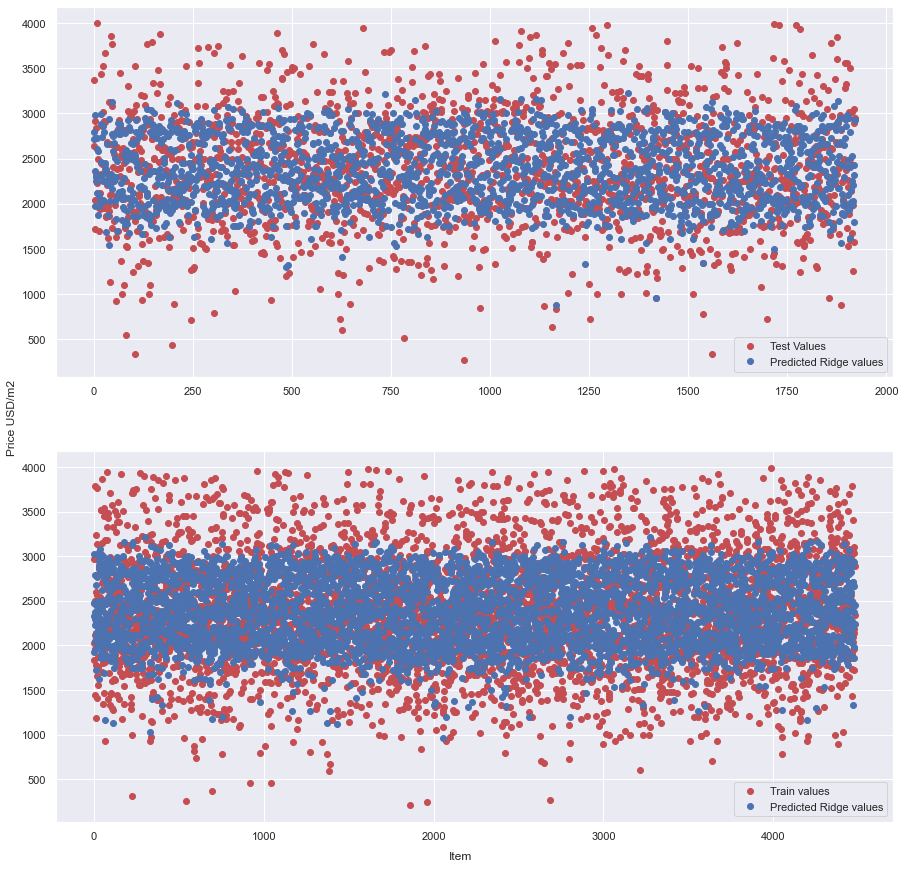

In [41]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],ridge_prediction, 'bo', label="Predicted Ridge values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],ridge_prediction_train, 'bo', label="Predicted Ridge values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

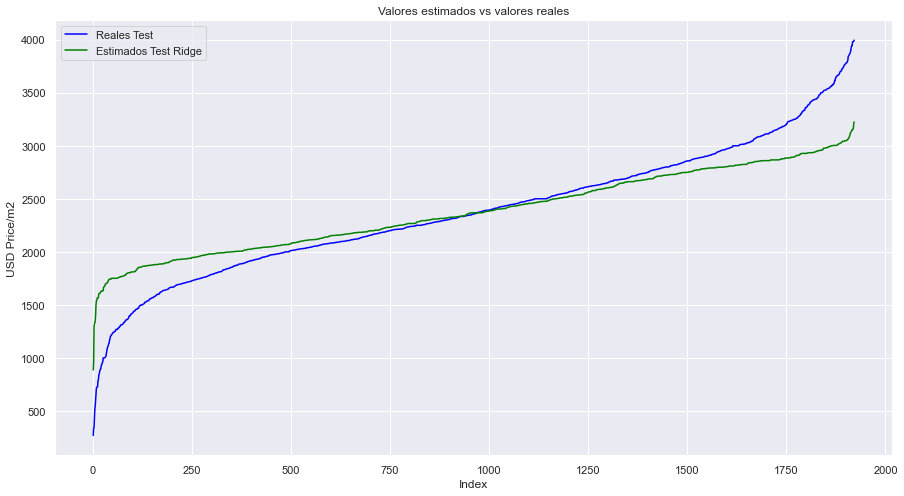

In [42]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(ridge_prediction), color='green', label='Estimados Test Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

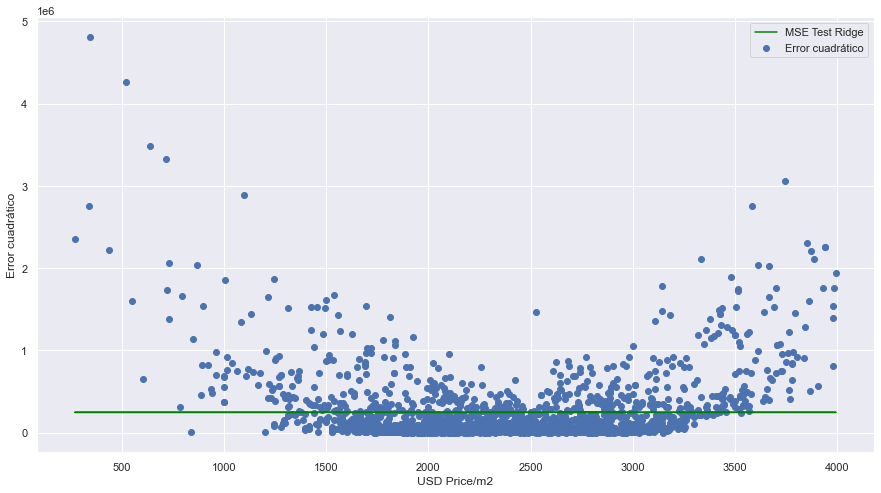

In [43]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ridge=pow(y_test - ridge_prediction,2)
plt.scatter(y_test,err_cuad_test_ridge, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ridge,len(err_cuad_test_ridge)), label='MSE Test Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

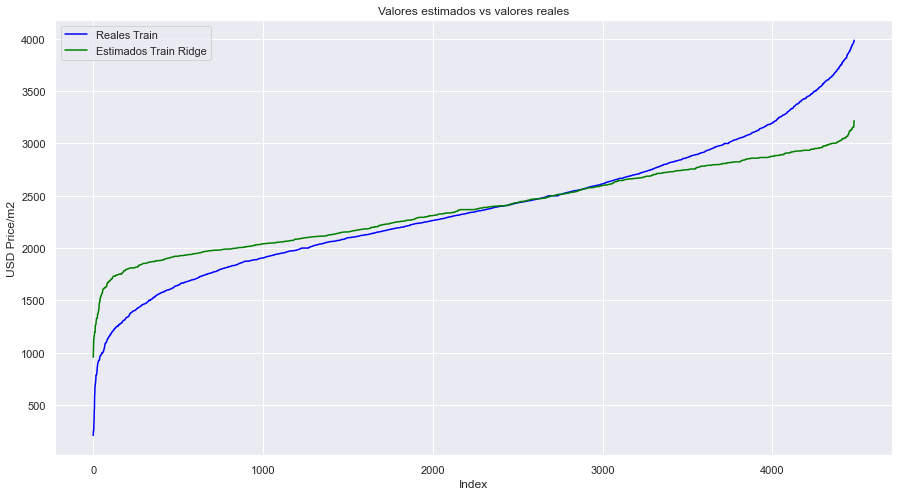

In [44]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(ridge_prediction_train), color='green', label='Estimados Train Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

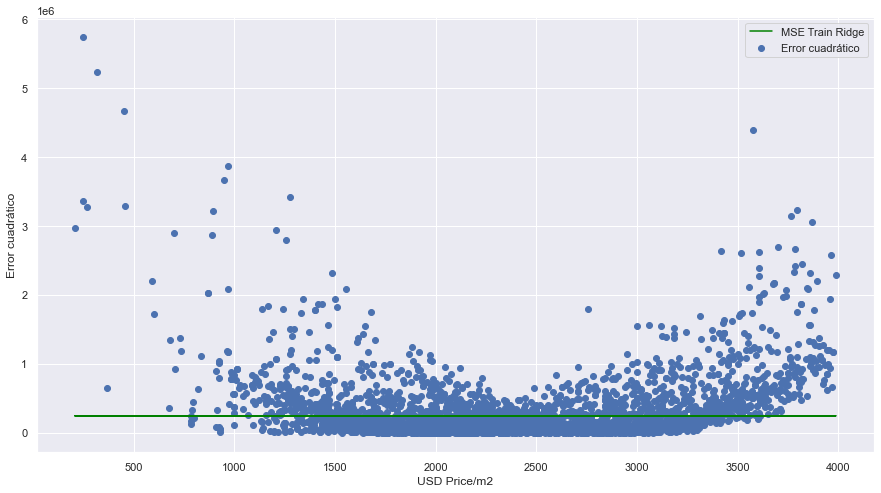

In [45]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ridge=pow(y_train - ridge_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ridge, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ridge,len(err_cuad_train_ridge)), label='MSE Train Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

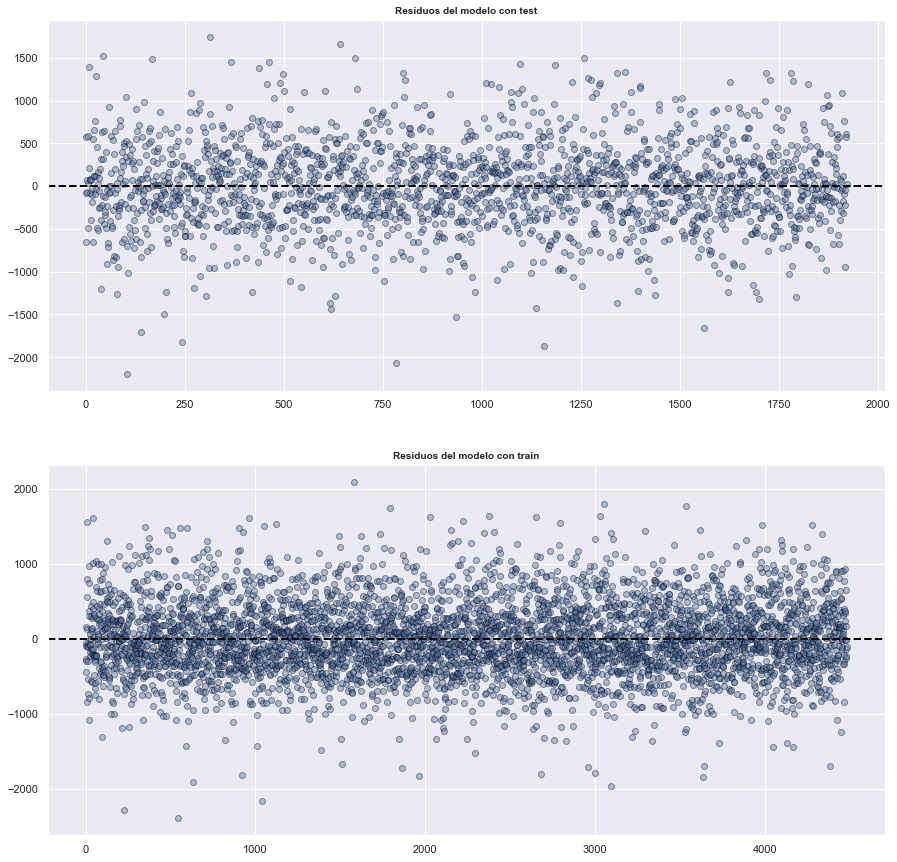

In [46]:
#Gráfico de los residuos/errores
model_residuals_test_ridge = y_test - ridge_prediction
model_residuals_train_ridge = y_train-ridge_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

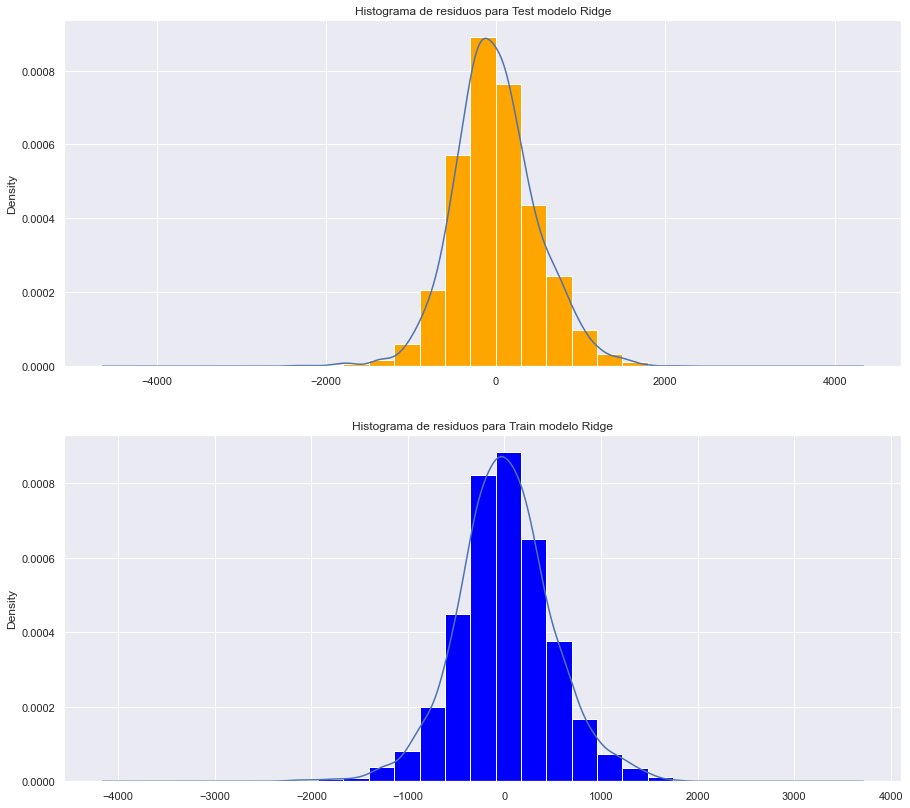

In [47]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ridge.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ridge.plot(kind = "kde",ax=ax2);
model_residuals_train_ridge.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ridge.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Ridge");
ax2.set_title("Histograma de residuos para Train modelo Ridge");

----
## Modelos comparados entre sí

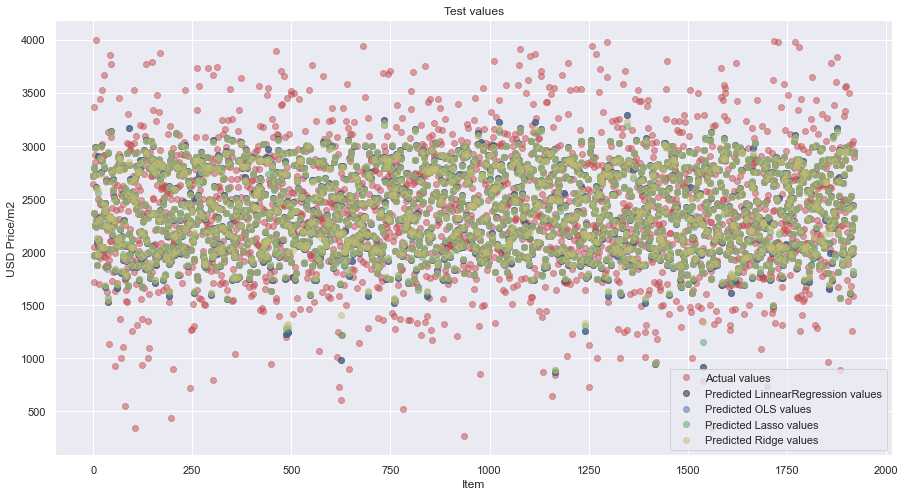

In [48]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Test values")
plt.show()

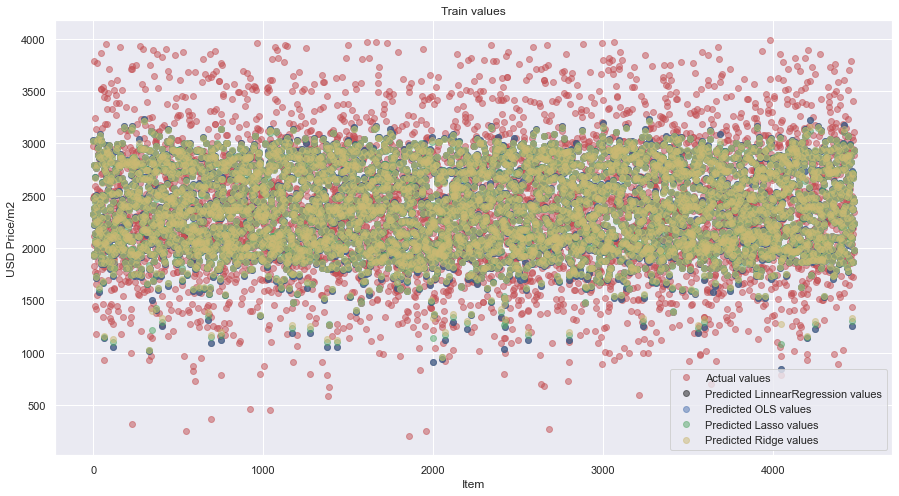

In [49]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_train))],y_train, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lr_prediction_train, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lasso_prediction_train, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],ridge_prediction_train, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Train values")
plt.show()

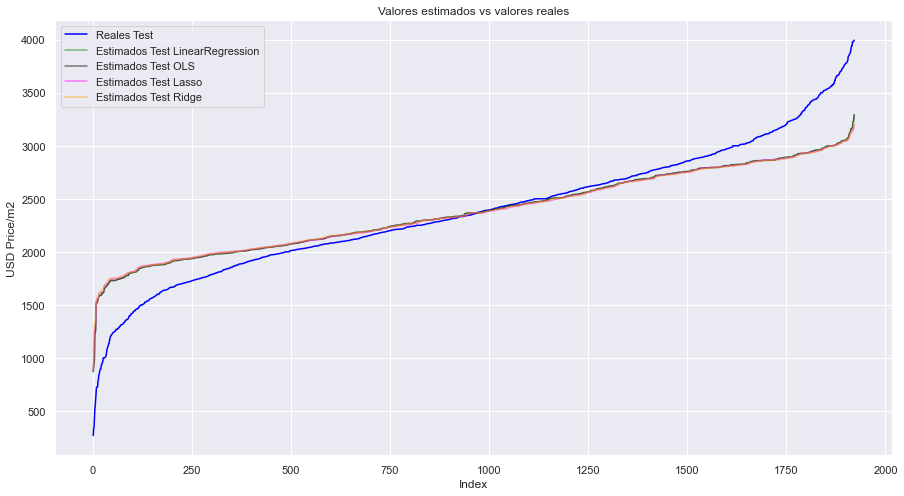

In [50]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction), color='black', label='Estimados Test OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction), color='magenta', label='Estimados Test Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction), color='orange', label='Estimados Test Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

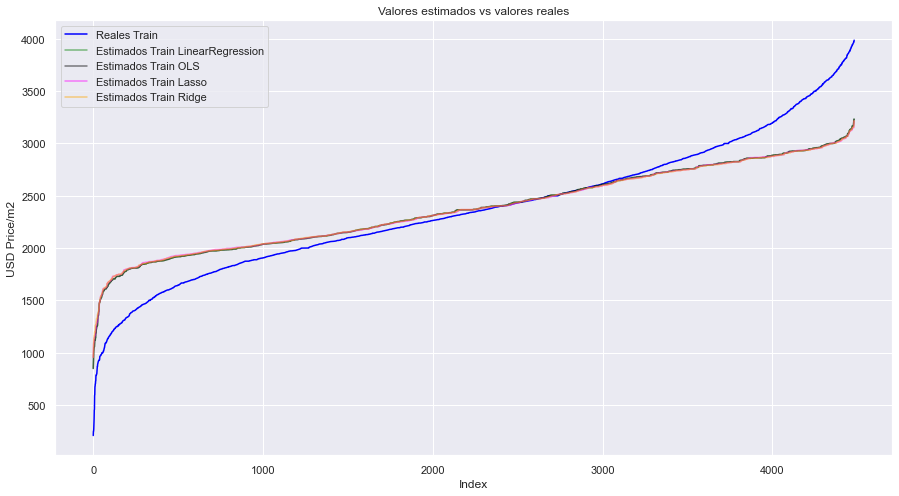

In [51]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction_train), color='black', label='Estimados Train OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction_train), color='magenta', label='Estimados Train Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction_train), color='orange', label='Estimados Train Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [52]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge],axis=1)

Modelo 1 LR   Modelo 1 OLS  Modelo 1 Lasso  Modelo 1 Ridge
MSE Test      246105.843601  246105.843601   245457.276663   245309.404718
MSE Train     242343.264632  242343.264632   242865.321497   242732.898272
MAE Test         380.854556     380.854556      379.925456      380.173169
MAE Train        379.217066     379.217066      380.036843      379.963386
RMSE Test        496.090560     496.090560      495.436451      495.287194
RMSE Train       492.283724     492.283724      492.813678      492.679306
R2 Test            0.330598       0.330598        0.332362        0.332765
R2 Train           0.385978       0.385978        0.384655        0.384991
R2 Adj Test        0.304141       0.345105        0.310084        0.306393
R2 Adj Train       0.375807       0.375807        0.376020        0.374804

In [53]:
# Parámetros
index_series = np.insert(X.columns.to_numpy(),0,'intercept')
series_lr = pd.Series(np.insert(coeff_lr,0,model_lr.intercept_),index=index_series, name="Linear Regression")
series_ols = pd.Series(model_ols.params.to_numpy(),index=index_series, name="OLS")
series_lasso = pd.Series(np.insert(coeff_lasso,0,model_lasso.intercept_),index=index_series, name="Lasso")
series_ridge = pd.Series(np.insert(coeff_ridge,0,model_ridge.intercept_),index=index_series, name="Ridge")

pd.set_option('display.max_rows', 500)
pd.concat([series_lr,series_ols,series_lasso,series_ridge],axis=1)

Linear Regression          OLS        Lasso  \
intercept                        1992.724209  1992.724209  2089.522496   
rooms                             -68.359053   -68.359053   -67.861449   
ptype_apartment                   130.640445   130.640445   125.671103   
ptype_house                        16.110739    16.110739     0.000000   
floor_1.0                         -36.297963   -36.297963   -47.257264   
floor_2.0                          17.318741    17.318741     3.797982   
floor_3.0                          29.990865    29.990865    17.075602   
floor_4.0                          23.091651    23.091651    10.084685   
floor_5.0                         137.984062   137.984062   127.559912   
floor_6.0                         118.678912   118.678912   106.077125   
floor_7.0                          28.055877    28.055877    10.343265   
floor_8.0                         127.321654   127.321654   112.036726   
floor_9.0                          -2.392733    -2.392733    -8.136476   
floor_10.0                        231.440147   231.440147   209.184512   
floor_11.0                        304.819459   304.819459   279.144978   
floor_12.0                        206.122664   206.122664   168.815290   
floor_13.0                        139.302802   139.302802    96.693858   
floor_14.0                        268.459970   268.459970   213.775437   
floor_15.0                        252.953202   252.953202   174.591277   
floor_16.0                        660.326612   660.326612   303.102535   
floor_17.0                        295.856289   295.856289   187.012016   
floor_18.0                         25.583568    25.583568     0.000000   
floor_20.0                        209.197710   209.197710     0.000000   
floor_21.0                        350.369022   350.369022     0.000000   
floor_22.0                        244.822047   244.822047     0.000000   
floor_23.0                         17.100789    17.100789     0.000000   
floor_24.0                        126.852211   126.852211     0.000000   
place_Almagro                     234.672323   234.672323   148.068354   
place_Balvanera                   -72.971128   -72.971128  -150.362646   
place_Barracas                      0.432085     0.432085   -69.464600   
place_Belgrano                    872.514796   872.514796   786.975307   
place_Boca                         41.416297    41.416297   -28.682451   
place_Boedo                         5.770468     5.770468   -60.403743   
place_Caballito                   452.390494   452.390494   372.341135   
place_Chacarita                   493.998232   493.998232   399.589013   
place_Coghlan                     608.721467   608.721467   509.489016   
place_Colegiales                  809.783390   809.783390   717.049104   
place_Constitución               -324.925538  -324.925538  -398.709438   
place_Flores                       55.565004    55.565004   -25.037256   
place_Floresta                   -124.073262  -124.073262  -185.512445   
place_Liniers                      34.676285    34.676285   -33.887387   
place_Mataderos                  -281.242045  -281.242045  -349.609126   
place_Monserrat                    93.273085    93.273085     4.273143   
place_Monte Castro                 94.236915    94.236915     0.000000   
place_Nueva Pompeya                36.104953    36.104953   -21.392053   
place_Nuñez                       732.386489   732.386489   642.264808   
place_Palermo                     876.564380   876.564380   793.074167   
place_Parque Avellaneda          -294.947428  -294.947428  -341.522775   
place_Parque Chacabuco             85.413782    85.413782     0.000000   
place_Parque Chas                 347.063619   347.063619   230.985136   
place_Parque Patricios            166.513741   166.513741    53.158998   
place_Paternal                     44.841837    44.841837    -0.000000   
place_Puerto Madero               883.990080   883.990080   113.176477   
place_Recoleta                 